In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14.7,8.27)})

In [5]:
store = pd.read_csv(
    "data/store.csv"
)
new_train = pd.read_csv("data/new_train.csv",index_col=0, dtype={"StateHoliday": object})
data = store.merge(new_train,on="Store")
data["Date"] = pd.to_datetime(data["Date"])
data["CompetitionDistance"].fillna(-1, inplace=True)

data["HasCompetition"] = np.where(data["CompetitionOpenSinceMonth"] >= 0, 1, 0)

In [6]:
int_cols = ["CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "Promo2SinceYear",
            "Promo2SinceWeek", 
           ]
data[int_cols] = data[int_cols].fillna(-1)
data[int_cols] = data[int_cols].astype(int)

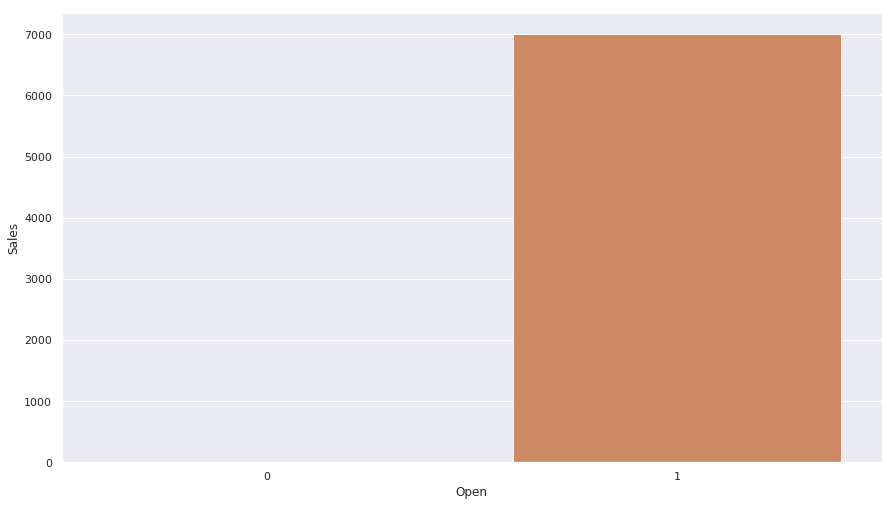

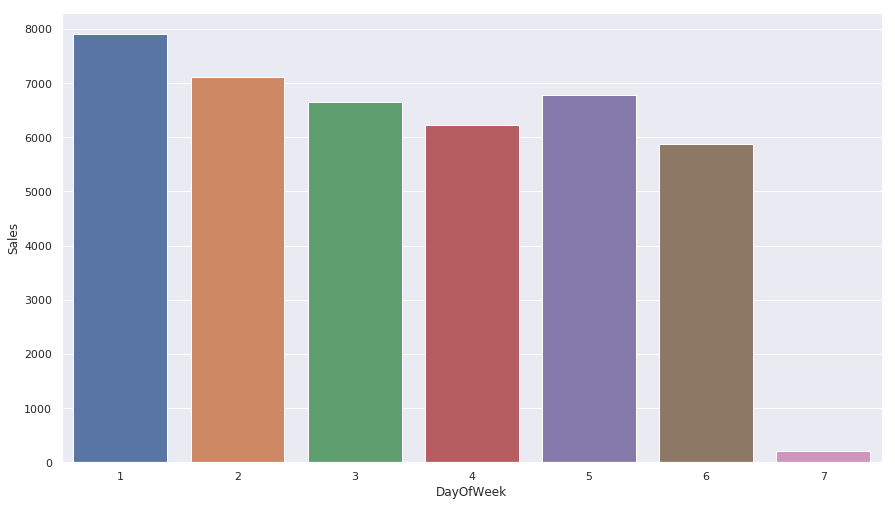

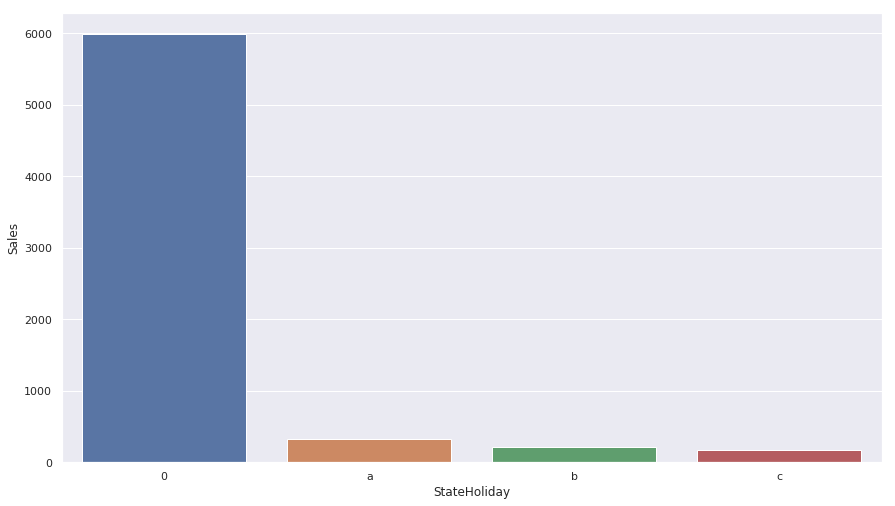

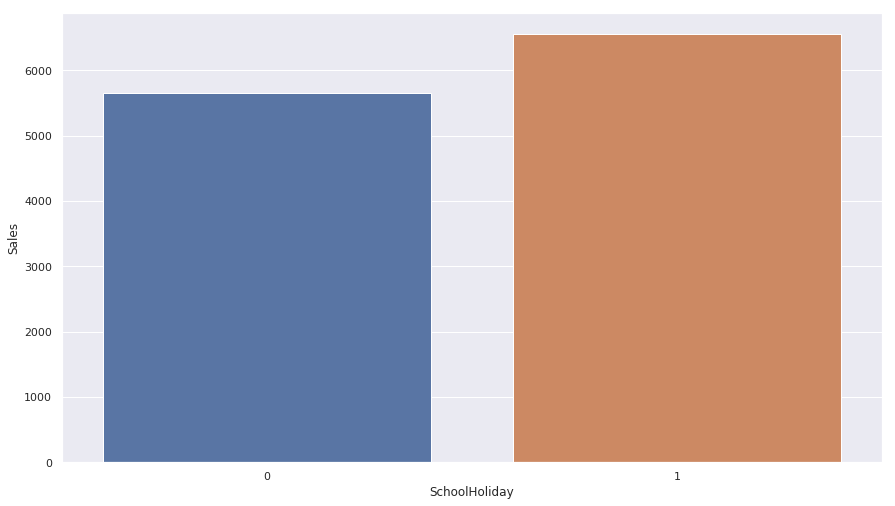

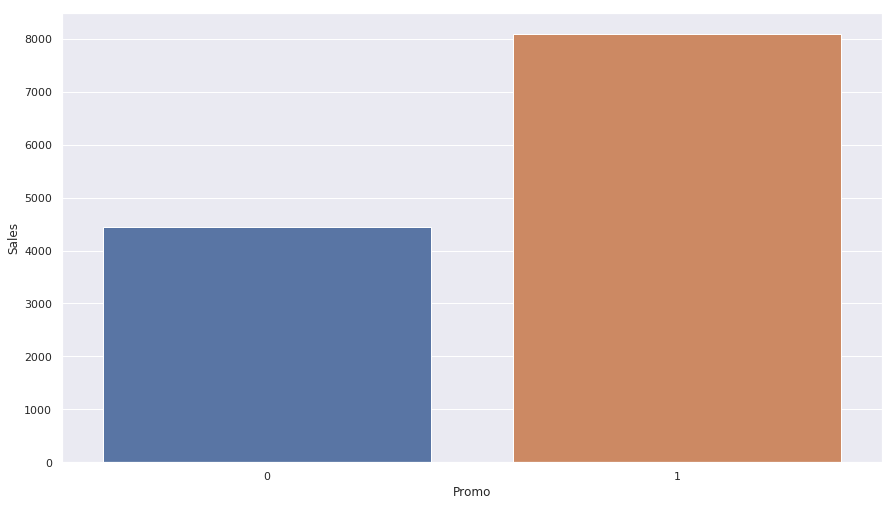

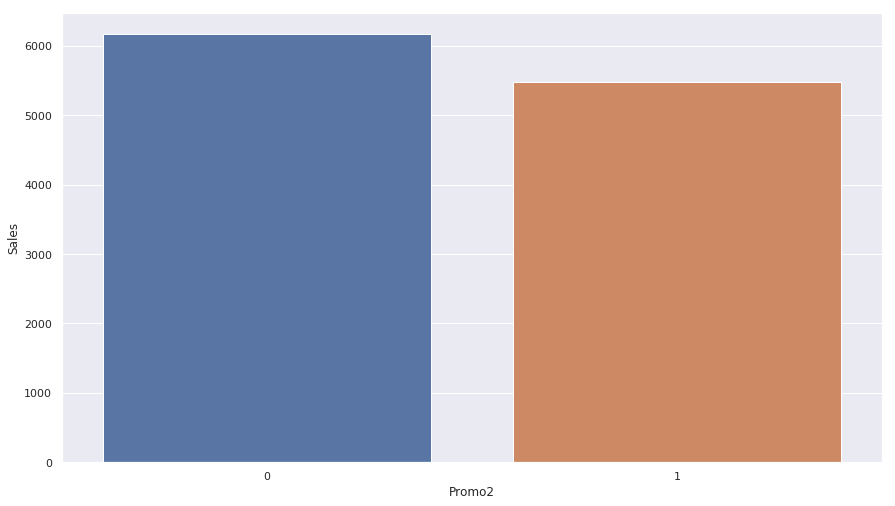

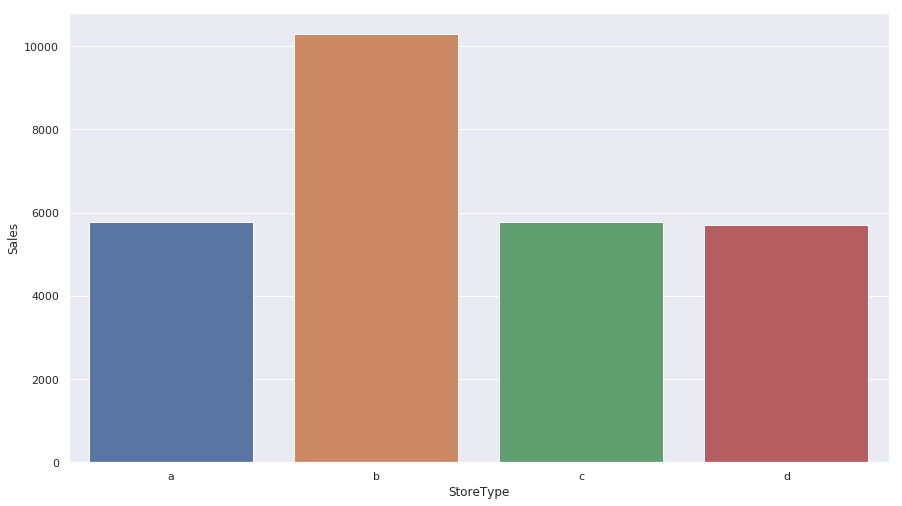

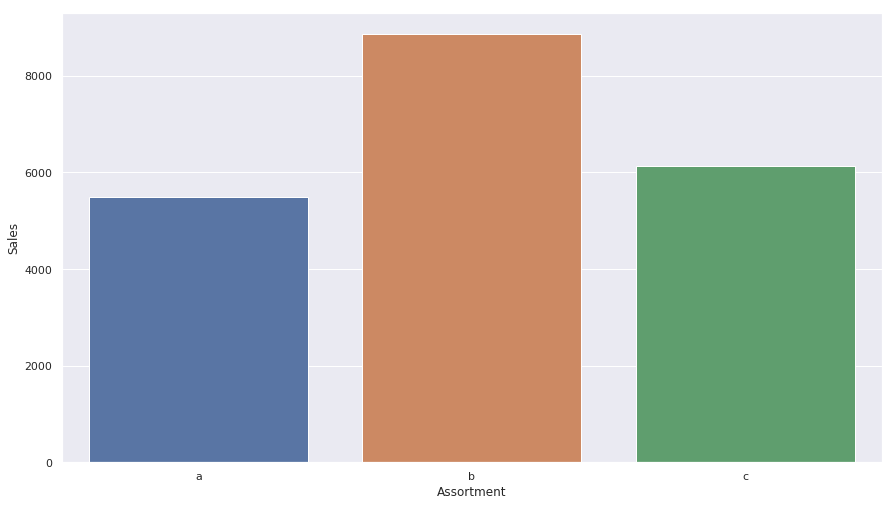

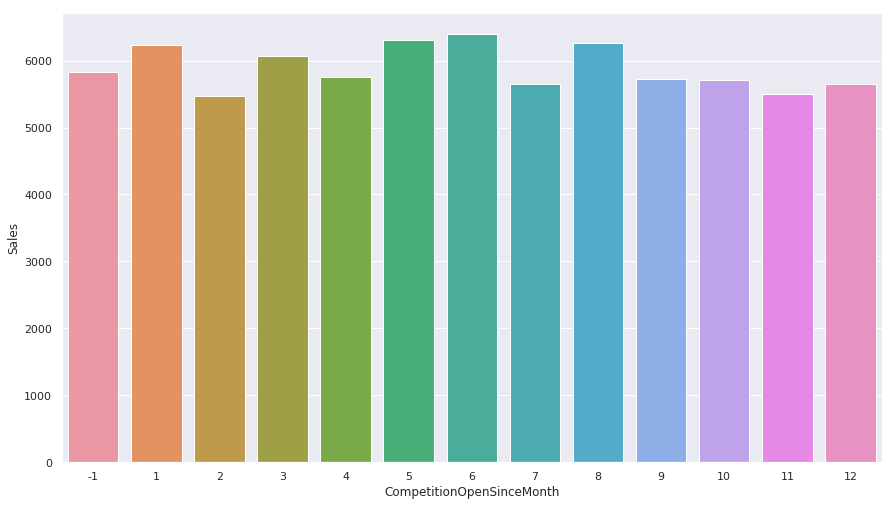

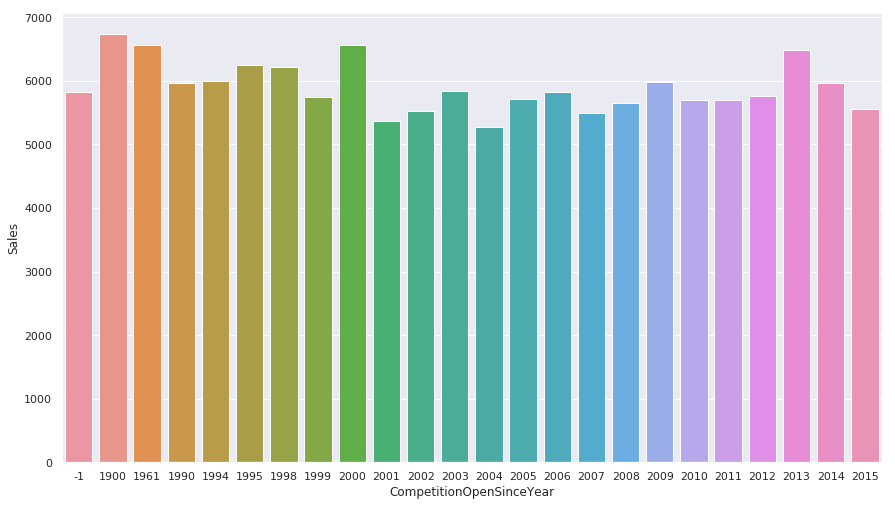

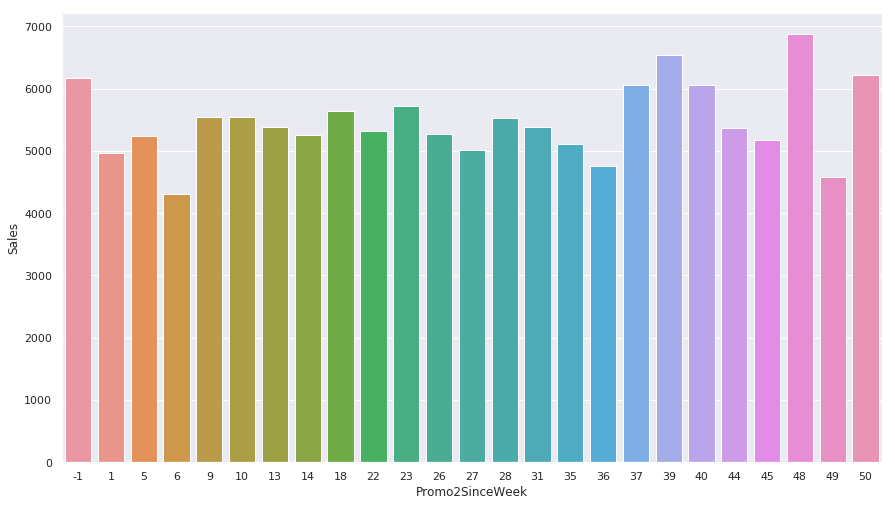

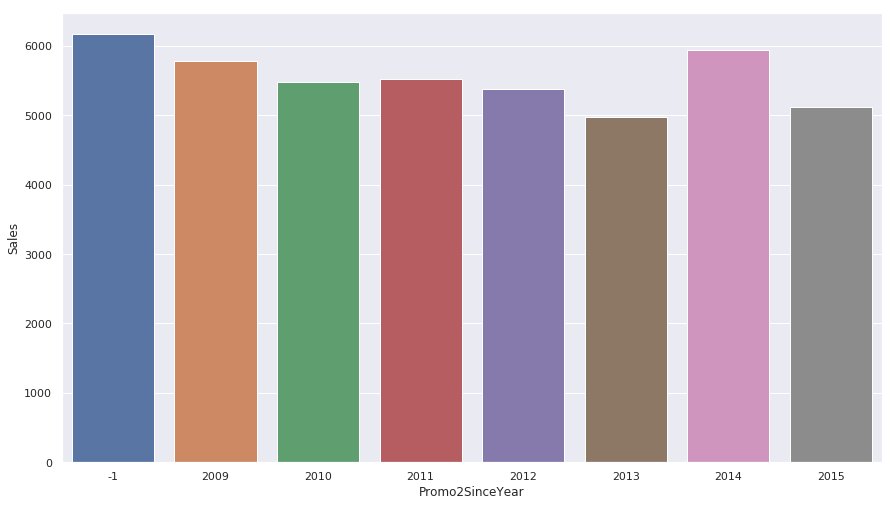

<Figure size 1058.4x595.44 with 0 Axes>

In [7]:
categoricals_to_graph = ["Open", "DayOfWeek", "StateHoliday", "SchoolHoliday", 
            "Promo", "Promo2", "StoreType", "Assortment", "CompetitionOpenSinceMonth",
            "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"
           ]

for column in categoricals_to_graph: 
    column_year_sales = data.groupby(column).mean()["Sales"].to_frame().reset_index()
    sns.barplot(column_year_sales[column], column_year_sales["Sales"])
    plt.figure()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 19 columns):
Store                        864627 non-null int64
StoreType                    864627 non-null object
Assortment                   864627 non-null object
CompetitionDistance          864627 non-null float64
CompetitionOpenSinceMonth    864627 non-null int64
CompetitionOpenSinceYear     864627 non-null int64
Promo2                       864627 non-null int64
Promo2SinceWeek              864627 non-null int64
Promo2SinceYear              864627 non-null int64
PromoInterval                431040 non-null object
DayOfWeek                    864627 non-null int64
Date                         864627 non-null datetime64[ns]
Sales                        864627 non-null int64
Customers                    864627 non-null int64
Open                         864627 non-null int64
Promo                        864627 non-null int64
StateHoliday                 864627 non-null object
SchoolH

In [11]:
MayDay = data.loc[(data["Date"].dt.month == 1) & (data["Date"].dt.day == 1),:]

NewYear = data.loc[(data["Date"].dt.month == 1) & (data["Date"].dt.day == 1),:]

Reunion = data.loc[(data["Date"].dt.month == 10) & (data["Date"].dt.day == 3),:]

Bulgaria = data.loc[(data["Date"].dt.month == 9) & (data["Date"].dt.day == 23),:]

MD = data.loc[(data["Date"].dt.month == 1) & (data["Date"].dt.day == 8),:]

Romania = data.loc[(data["Date"].dt.month == 1) & (data["Date"].dt.day == 24),:]

Estland = data.loc[(data["Date"].dt.month == 2) & (data["Date"].dt.day == 24),:]

Finland = data.loc[(data["Date"].dt.month == 2) & (data["Date"].dt.day == 2),:]

SRB = data.loc[(data["Date"].dt.month == 2) & (data["Date"].dt.day == 15),:]

AND = data.loc[(data["Date"].dt.month == 3) & (data["Date"].dt.day == 14),:]

BIH = data.loc[(data["Date"].dt.month == 3) & (data["Date"].dt.day == 1),:]

GB = data.loc[(data["Date"].dt.month == 3) & (data["Date"].dt.day == 18),:]

GR = data.loc[(data["Date"].dt.month == 25) & (data["Date"].dt.day == 2),:]



Berlin = data.loc[(data["Date"].dt.month == 3) & (data["Date"].dt.day == 8),:]

Thueringen = data.loc[(data["Date"].dt.month == 9) & (data["Date"].dt.day == 20),:]

SouthGermany = data.loc[(data["Date"].dt.month == 11) & (data["Date"].dt.day == 1),:]

NorthGermany = data.loc[(data["Date"].dt.month == 10) & (data["Date"].dt.day == 31),:]

1+2

3

In [47]:
Germany = data.loc[((data["Date"].dt.month == 10) & (data["Date"]\
.dt.day == 3)) & (data["StateHoliday"] != 0),:]["Store"].drop_duplicates()
Germany.head()

301     1
1107    2
1913    3
2719    4
3525    5
Name: Store, dtype: int64

In [69]:
f = data.loc[((data["Date"].dt.month == 10) & (data["Date"].dt.day == 3)) & (data["StateHoliday"] != 'b')]["Store"].drop_duplicates()
f.shape

(1115,)

In [58]:
len(data.Date.dt.month)

864627

In [20]:
Bulgaria = Bulgaria.loc[Bulgaria["StateHoliday"] != 0, :]
Bulgaria.shape

(2050, 19)

In [46]:
MD = data.loc[((data["Date"].dt.month == 1) & (data["Date"]\
.dt.day == 8)) & (data["StateHoliday"] != 0),:]["Store"].drop_duplicates()
MD.head()

204     1
1010    2
1816    3
2622    4
3428    5
Name: Store, dtype: int64

In [13]:
Reunion.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,HasCompetition
301,1,c,a,1270.0,9,2008,0,-1,-1,NaN,5,2014-10-03,0,0,0,1,a,0,1
666,1,c,a,1270.0,9,2008,0,-1,-1,NaN,4,2013-10-03,0,0,0,0,a,0,1
1107,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",5,2014-10-03,2689,389,1,1,a,0,1
1472,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",4,2013-10-03,2656,381,1,0,a,0,1
1913,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",5,2014-10-03,0,0,0,1,a,0,1
